In [1]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [3]:
url = "https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/wine.txt"
urllib.request.urlretrieve(url, 'wine.txt') 

('wine.txt', <http.client.HTTPMessage at 0x1a24cbb7d0>)

In [4]:
df = pd.read_csv("wine.txt", sep="\t", index_col=0)
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


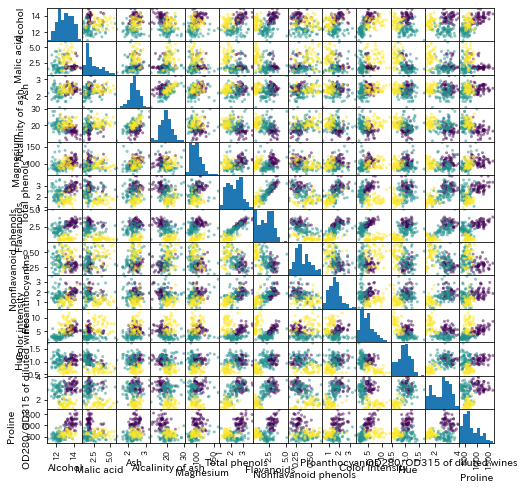

In [5]:
from pandas import plotting 
plotting.scatter_matrix(df.iloc[:, 1:], figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5)
plt.show()

In [6]:
# 行列の標準化
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [7]:
#主成分分析の実行
pca = PCA()
feature = pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

In [8]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.307421,-1.439402,-0.165273,-0.215025,0.691093,-0.223250,0.594749,0.064956,0.639638,1.018084,-0.450293,0.539289,-0.066052
1,2.203250,0.332455,-2.020757,-0.290539,-0.256930,-0.924512,0.053624,1.021534,-0.307978,0.159252,-0.142256,0.387146,0.003626
2,2.509661,-1.028251,0.980054,0.722863,-0.250327,0.547731,0.423012,-0.343248,-1.174521,0.113042,-0.285866,0.000582,0.021655
3,3.746497,-2.748618,-0.175696,0.566386,-0.310964,0.114109,-0.382259,0.641783,0.052397,0.238739,0.757448,-0.241339,-0.368444
4,1.006070,-0.867384,2.020987,-0.408613,0.297618,-0.405376,0.442825,0.415528,0.325900,-0.078146,-0.524466,-0.216055,-0.079140


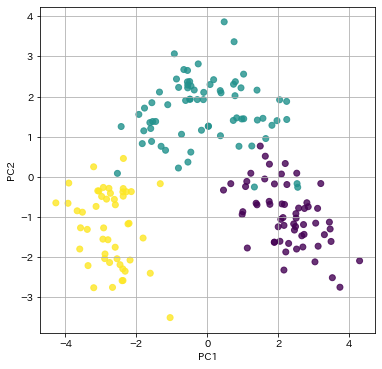

In [9]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

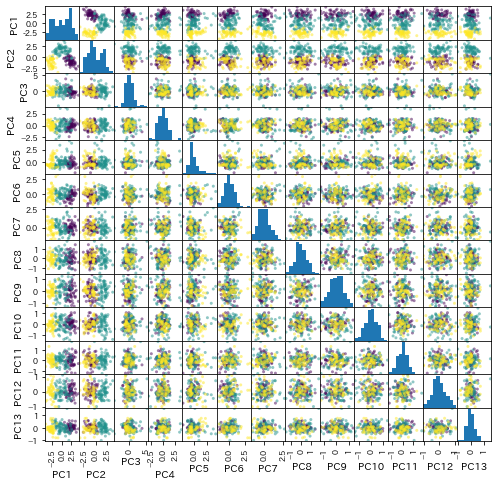

In [10]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

In [11]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.361988
PC2,0.192075
PC3,0.111236
PC4,0.070690
PC5,0.065633
PC6,0.049358
PC7,0.042387
PC8,0.026807
PC9,0.022222
PC10,0.019300


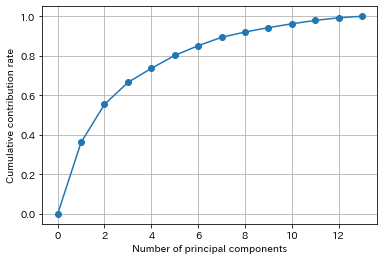

In [12]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [13]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,4.705850
PC2,2.496974
PC3,1.446072
PC4,0.918974
PC5,0.853228
PC6,0.641657
PC7,0.551028
PC8,0.348497
PC9,0.288880
PC10,0.250902


In [14]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=df.columns[1:], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
PC3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
PC4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
PC5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
PC6,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
PC7,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
PC8,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
PC9,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
PC10,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


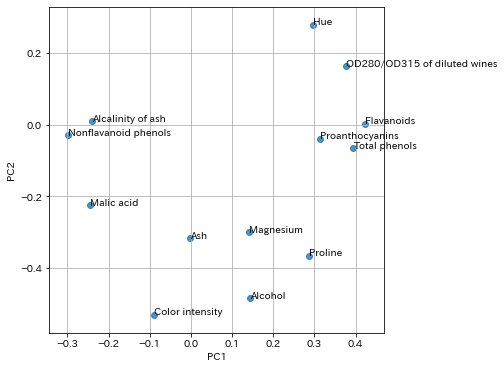

In [15]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [20]:
dfs.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [22]:
len(feature[0])

13

In [23]:
dfs2=dfs[['Color intensity', 'Flavanoids', 'Alcohol', 'Proline']]

In [38]:
pca2=PCA()
pca2.fit(dfs2)
feature2=pca2.transform(dfs2)

In [39]:
len(feature2)

178

In [40]:
# 主成分得点
pd.DataFrame(feature2, columns=["PC{}".format(x + 1) for x in range(len(dfs2.columns))]).head()
# 主成分得点
# pd.DataFrame(feature2, columns=["PC{}".format(x + 1) for x in range(2)]).head()

,PC1,PC2,PC3,PC4
0,1.961585,-0.545627,-0.197206,0.507026
1,0.844371,-0.875875,-0.203594,-0.293168
2,1.457648,-0.966836,0.294984,-0.607212
3,3.377947,-0.513604,0.111948,-0.339856
4,0.240919,-0.624128,0.070921,0.417963


In [41]:
# 寄与率
pd.DataFrame(pca2.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs2.columns))])

# pd.DataFrame(pca2.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(2)])

,0
PC1,0.533531
PC2,0.309520
PC3,0.084787
PC4,0.072162


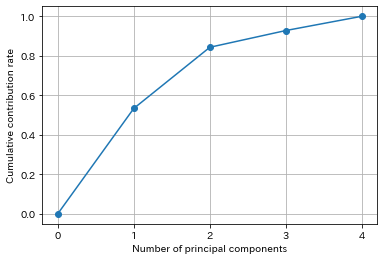

In [42]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca2.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

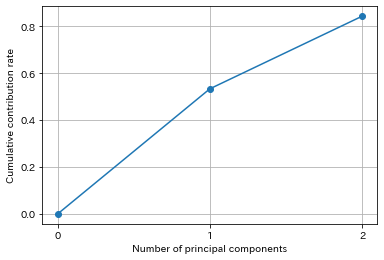

In [37]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca2.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()